In [3]:
import torch
from torch.utils.data import Dataset,DataLoader
from pycocotools.coco import COCO
import matplotlib.pyplot as plt

In [4]:
img_dir = 'dataset/train2017'
ann_file = 'dataset/annotations_trainval2017/annotations/person_keypoints_train2017.json'

In [5]:
coco = COCO(ann_file)
category_ids = coco.getCatIds()
categories = coco.loadCats(category_ids)
for category in categories:
    print(f"Id:{category['id']},Name:{category['name']}")

loading annotations into memory...
Done (t=7.05s)
creating index...
index created!
Id:1,Name:person


loading annotations into memory...
Done (t=7.02s)
creating index...
index created!


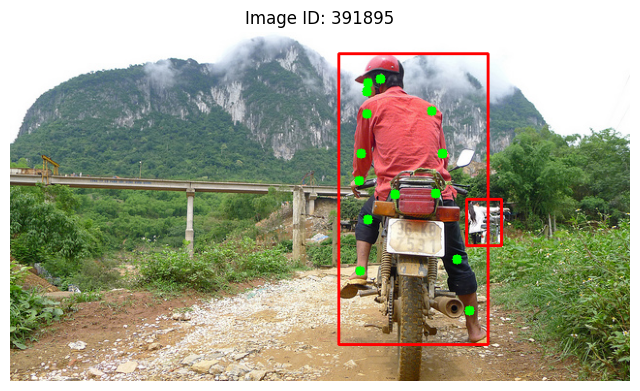

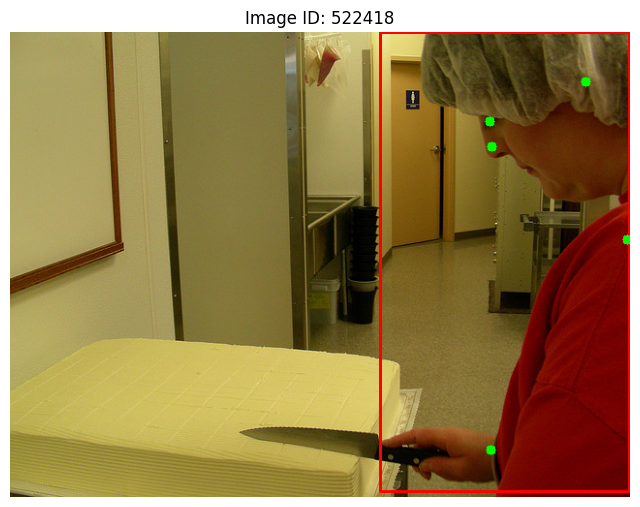

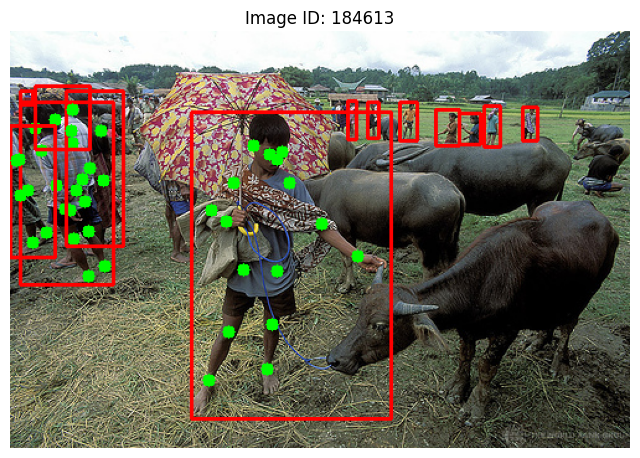

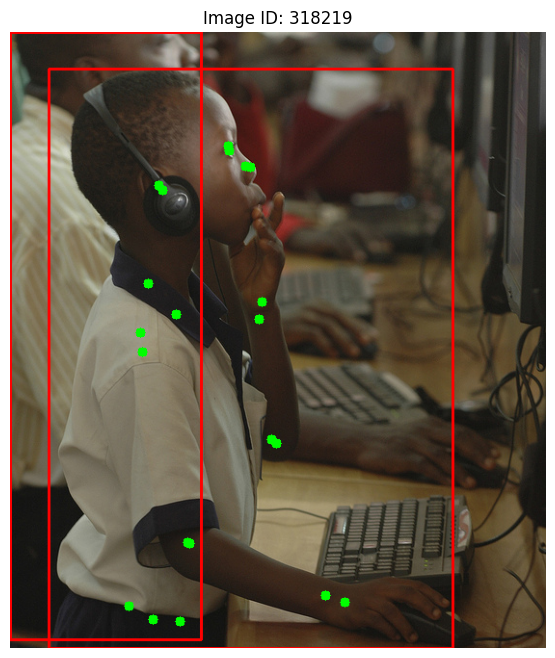

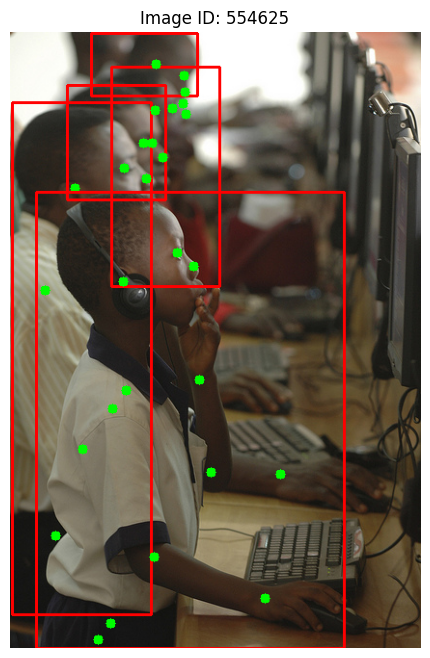

In [10]:
import os
import cv2

def visualize_coco_keypoints(img_dir, ann_file, num_samples=5):
    coco = COCO(ann_file)
    img_ids = coco.getImgIds()

    for img_id in img_ids[:num_samples]:
        img_info = coco.loadImgs(img_id)[0]
        img_path = os.path.join(img_dir, img_info['file_name'])
        
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

        ann_ids = coco.getAnnIds(imgIds=img_id, iscrowd=False)
        anns = coco.loadAnns(ann_ids)

        for ann in anns:
            keypoints = ann['keypoints']
            bbox = ann['bbox']
            
            x, y, w, h = bbox
            cv2.rectangle(img, (int(x), int(y)), (int(x+w), int(y+h)), (255, 0, 0), 2)

            for i in range(0, len(keypoints), 3):
                x, y, v = keypoints[i:i+3]        
                if v > 0:  # v > 0 means the keypoint is visible
                    cv2.circle(img, (int(x), int(y)), 5, (0, 255, 0), -1)

        # Display the image
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Image ID: {img_id}")
        plt.show()


visualize_coco_keypoints(img_dir, ann_file)


In [ ]:
class PoseEstimation(Dataset):
    def __init__(self, img_dir, ann_file, transform=None):
        super().__init__()
        self.img_dir = img_dir
        self.coco = COCO(ann_file)
        self.transform = transform

        
    
